# Linear and Logistic Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [2]:
dataset=pd.read_csv("HRV.csv")

## Dataset Preprocessing

In [3]:
dataset.head()

,male,age,currentSmoker,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4234 entries, 0 to 4233
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   male           4234 non-null   int64  
 1   age            4234 non-null   int64  
 2   currentSmoker  4234 non-null   int64  
 3   totChol        4184 non-null   float64
 4   sysBP          4234 non-null   float64
 5   diaBP          4234 non-null   float64
 6   BMI            4215 non-null   float64
 7   heartRate      4233 non-null   float64
 8   glucose        3847 non-null   float64
 9   TenYearCHD     4234 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 330.9 KB


## Fill in null values

In [5]:
dataset.isnull().sum()

male               0
age                0
currentSmoker      0
totChol           50
sysBP              0
diaBP              0
BMI               19
heartRate          1
glucose          387
TenYearCHD         0
dtype: int64

In [6]:
totChol_median=dataset['totChol'].median()

In [7]:
dataset['totChol'].fillna(totChol_median, inplace=True)

In [8]:
dataset['totChol'].isnull().sum()

0

In [9]:
BMI_median=dataset['BMI'].median()

In [10]:
dataset['BMI'].fillna(BMI_median, inplace=True)

In [11]:
dataset['BMI'].isnull().sum()

0

In [12]:
HR_median=dataset['heartRate'].median()

In [13]:
dataset['heartRate'].fillna(HR_median, inplace=True)

In [14]:
dataset['heartRate'].isnull().sum()

0

In [15]:
glucose_median=dataset['glucose'].median()

In [16]:
dataset['glucose'].fillna(glucose_median, inplace=True)

In [17]:
dataset['glucose'].isnull().sum()

0

## A. Linear Regression - Create a model to predict the cholestrol level of a person

### Create independent and dependent variables to predict 

In [18]:
x=dataset.drop("totChol", axis=1)

In [19]:
y=dataset[['totChol']]

In [20]:
x.sample()

,male,age,currentSmoker,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4166,0,41,1,105.0,74.0,20.85,87.0,78.0,0


In [21]:
y.sample()

,totChol
3845,233.0


## Splitting the dataset into the Training set and Test set

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,
                                                 test_size=.20,
                                                 random_state=42)

## Training the Linear Regression model 

In [23]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train.values, y_train)

LinearRegression()

In [24]:
print("coefficients", regressor.coef_)

coefficients [[-6.10835121e+00  1.20727781e+00  3.74471801e+00  4.49745487e-02
   2.63122919e-01  5.60529818e-01  2.94535793e-01  5.61151792e-03
   6.57240877e-01]]


In [25]:
print("intercept", regressor.intercept_)

intercept [112.88165673]


In [26]:
y_pred=regressor.predict(x_test.values)
y_pred[:5]

array([[245.74887664],
       [239.85076839],
       [240.27791908],
       [226.47260815],
       [257.96442703]])

In [27]:
y_test.head()

,totChol
1173,325.0
2236,270.0
1578,272.0
594,205.0
3076,289.0


In [28]:
x.head()

,male,age,currentSmoker,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,130.0,84.0,23.10,85.0,85.0,0


## Model performance check- R Square and RMSE score

In [29]:
from sklearn.metrics import mean_squared_error, r2_score
import math
print(f"r2_score: {r2_score(y_test,y_pred):.2f}")
print(f"RMSE: {math.sqrt(mean_squared_error(y_test,y_pred)):.0f}")

r2_score: 0.09
RMSE: 41


## Predicting new results where the actual results are given
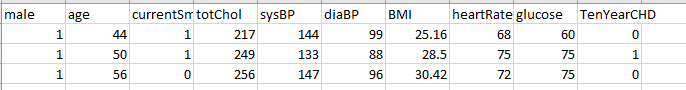

In [52]:
# case 1 actual 217
regressor.predict([[1,44,1,144,99,25.16,68,60,0]])

array([[230.63180653]])

In [53]:
# case 2 actual 249
regressor.predict([[1,50,1,133,88,28.5,75,75,1]])

array([[239.16173506]])

In [54]:
# case 3 actual 256
regressor.predict([[1,56,0,147,96,30.42,72,75,0]])

array([[244.93067996]])

## B. Logistic Regression - Create a model to predict the 10 year risk of coronary heart disease CHD of a person

In [33]:
x=dataset.drop("TenYearCHD", axis=1)
y=dataset[['TenYearCHD']]

In [34]:
x.sample()

,male,age,currentSmoker,totChol,sysBP,diaBP,BMI,heartRate,glucose
2798,0,62,0,313.0,164.0,94.0,27.4,70.0,81.0


### Create independent and dependent variables to predict

In [35]:
x=pd.get_dummies(x)

In [36]:
x.sample()

,male,age,currentSmoker,totChol,sysBP,diaBP,BMI,heartRate,glucose
811,1,66,0,233.0,108.0,66.0,25.16,75.0,72.0


## Splitting the dataset into the Training set and Test set

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train, x_test, y_train, y_test=train_test_split(x,y,
                                                 test_size=.20,
                                                 random_state=42)

## Training the Logistic Regression model 

In [39]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(max_iter=1000)
classifier.fit(x_train, y_train.values.ravel())

LogisticRegression(max_iter=1000)

### Predicting Trial

In [40]:
x.sample()

,male,age,currentSmoker,totChol,sysBP,diaBP,BMI,heartRate,glucose
2367,0,54,0,315.0,176.0,87.0,29.23,82.0,72.0


In [41]:
print(classifier.predict([[0,41,1,210,116,75.5,23.54,67,78]]))

[0]


C:\Users\clay\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [42]:
dataset.sample()

,male,age,currentSmoker,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
145,1,48,0,293.0,149.0,100.0,31.61,87.0,76.0,1


In [43]:
print(classifier.predict([[0,40,1,220,120,75,19.32,78,78]]))

[0]


C:\Users\clay\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### Confusion Matrix

In [44]:
y_pred=classifier.predict(x_test.values)

C:\Users\clay\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [45]:
y_pred[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [46]:
y_test.head()

,TenYearCHD
1173,1
2236,0
1578,0
594,0
3076,0


In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[730   5]
 [108   4]]


In [48]:
print(classifier.classes_)

[0 1]


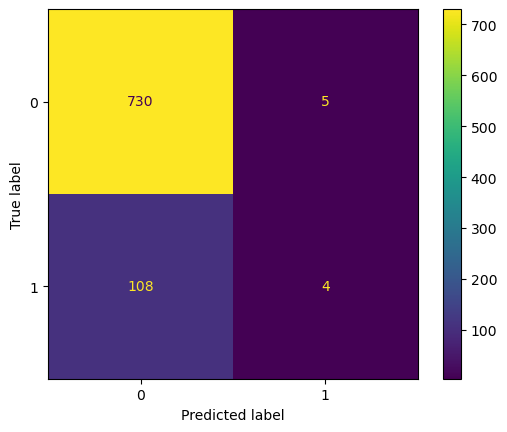

In [49]:
display=ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=classifier.classes_)
display.plot()
plt.show()

### Discuss the results

### True negative (Actually not at risk and predicted not at risk): 731
### True positive (Actually at risk and predicted at risk): 2
### False positive (Actually not at risk but predicted risk): 4
### False negative (Actually at risk but predicted not at risk): 110

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       735
           1       0.44      0.04      0.07       112

    accuracy                           0.87       847
   macro avg       0.66      0.51      0.50       847
weighted avg       0.81      0.87      0.81       847



## Predicting new results where the actual results are given
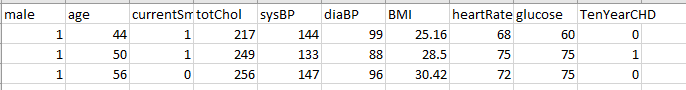

In [55]:
classifier.predict([[1,44,1,217,144,99,25.16,68,60]])

C:\Users\clay\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [56]:
classifier.predict([[1,50,1,249,133,88,28.5,75,75]])

C:\Users\clay\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [57]:
classifier.predict([[1,56,0,256,147,96,30.42,72,75]])

C:\Users\clay\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

### Summary

### Our linear regression model for predicitng cholesterol was quite accurate. In the three tests we did, it predicted cholesterol levels of patinets within 95% of the actual number (IT was roughly 5% off everytime). 

### Our logistical regression model was also quite succesful. its F1 score was 93% when it came to true negatives (It was incredibly accurate at identifiyign patients not at risk). However, it was much less accurate finding patients who are at risk of CHD. This is due to the very smal smaple size of those who are at risk for CHD. The model needs more practice and a larger sample when it comes to detecting positives. It had a F1 score of 7% for that.